# TA Class I

## matplotlib Quick Review

In [18]:
import matplotlib.pyplot as plt
import random
import string
%matplotlib inline

#### You can either plot a list directly or assign some specific X's and Y's.

[(18, 90), (94, 41), (24, 90), (69, 15), (13, 46), (35, 1), (96, 35), (42, 49), (82, 96), (69, 11)]


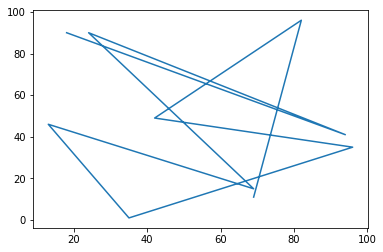

In [19]:
random.seed(87)
X = list(random.randint(0, 100) for _ in range(10))
Y = list(random.randint(0, 100) for _ in range(10))
print(list(zip(X,Y)))
plt.plot(X, Y)

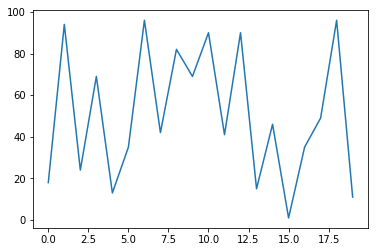

In [20]:
random.seed(87)
plt_list = list(random.randint(0, 100) for _ in range(20)) 
plt.plot(plt_list)

##### You can slice the list and plot it.

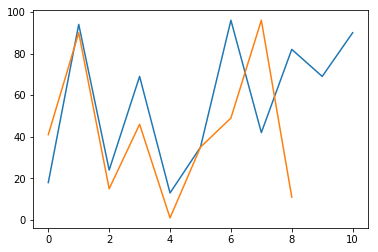

In [21]:
plt.plot(plt_list[0:11])
plt.plot(plt_list[11:20])

##### Bar plot

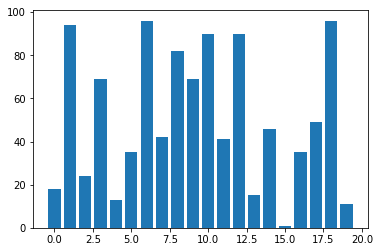

In [22]:
bar_X = list(range(20))
bar_plot = plt.bar(bar_X, plt_list)

##### customize

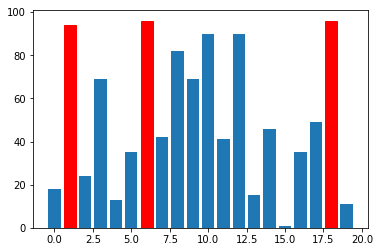

In [23]:
bar_plot = plt.bar(bar_X, plt_list)
for i in range(len(plt_list)):
    if plt_list[i] > 90:
        bar_plot[i].set_color('r')

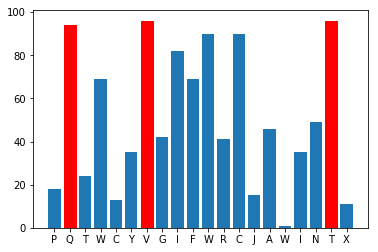

In [24]:
letters = string.ascii_uppercase
bar_labels = list(random.choice(letters) for i in range(20))
bar_plot = plt.bar(bar_X, plt_list, tick_label = bar_labels)
for i in range(len(plt_list)):
    if plt_list[i] > 90:
        bar_plot[i].set_color('r')

##### Pie chart

([<matplotlib.patches.Wedge at 0x18f08e10>,
 [Text(-0.6465637441936393, 0.8899187180267096, '70'),
  Text(0.5299289404315163, -0.9639374036176471, '26'),
  Text(1.0913261524711573, -0.13786670712140953, '4')])

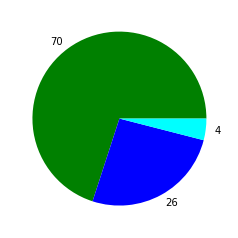

In [25]:
pie_X = ['A', 'B', 'C']
pie_Y = [70, 26, 4]
plt.pie(pie_Y, labels=pie_Y, colors=['g', 'b', 'cyan'])

##### Subplots

Text(0.5, 1.0, 'Cosine')

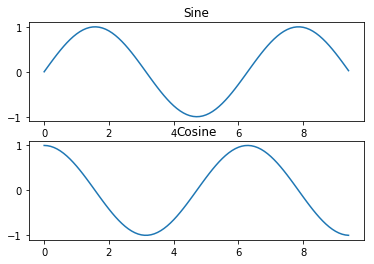

In [26]:
import numpy as np    # numpy will be covered in the next TA class

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# !!!!! Set up a subplot grid that has height 2 and width 1, and set the first such subplot as active.
plt.subplot(2, 1, 1)    # <- the meaning of (2, 1, 1) is......

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

##### Scatter plot

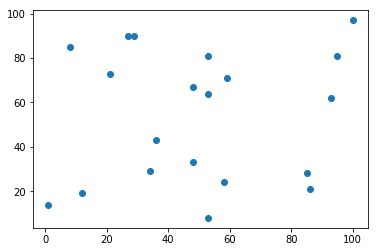

In [27]:
random.seed(8787)
scat_X = list(random.randint(0, 100) for _ in range(20)) 
scat_Y = list(random.randint(0, 100) for _ in range(20))
plt.scatter(scat_X, scat_Y)

##### Real world data......

In [28]:
import csv, os, datetime 

f = open("ubike.csv", "r")

station = {} 
count = {} 
lat = {} 
lon = {} 
capacity = {} 
for row in csv.DictReader(f):
    time = datetime.datetime.strptime(row["time"], "%Y/%m/%d %H:%M")
    time = time.hour
    if time == 17 or time == 18:
        id = int(row["id"])
        if id not in station:
            lat[id] = float(row["latitude"])
            lon[id] = float(row["longitude"])
            capacity[id] = int(row["lot"])
            station[id] = int(row["bike"])
            count[id] = 1
        else:
            station[id] += int(row["bike"])
            capacity[id] += int(row["lot"])
            count[id] += 1
f.close()

In [29]:
id_seq = station.keys()
id_seq = sorted(id_seq)
redlat = [] 
redlon = [] 
yellowlat = [] 
yellowlon = [] 
greenlat = [] 
greenlon = [] 
bluelat = [] 
bluelon = [] 

for k in id_seq:
    capacity[k] = float(capacity[k]) / count[k]
    station[k] = (float(station[k]) / count[k]) / capacity[k]
    if station[k] < 0.2:
        redlat.append(lat[k])
        redlon.append(lon[k])
    elif 0.2 <= station[k] < 0.3:
        yellowlat.append(lat[k])
        yellowlon.append(lon[k])
    elif 0.3 <= station[k] < 0.4:
        greenlat.append(lat[k])
        greenlon.append(lon[k])
    else:
        bluelat.append(lat[k])
        bluelon.append(lon[k])

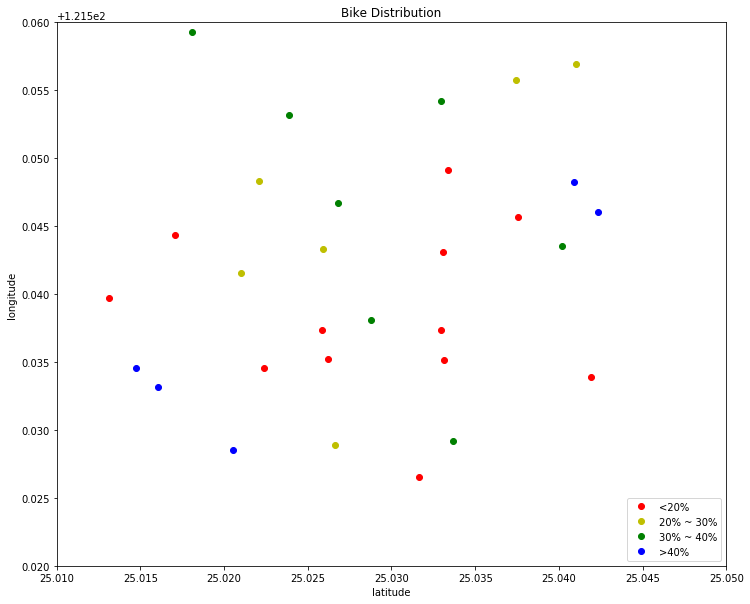

In [102]:
# without style
plt.figure(figsize = (12, 10))
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("Bike Distribution")
plt.plot(redlat, redlon, 'ro', label = '<20%')
plt.plot(yellowlat, yellowlon, 'yo', label = '20% ~ 30%')
plt.plot(greenlat, greenlon, 'go', label = '30% ~ 40%')
plt.plot(bluelat, bluelon, 'bo', label = '>40%')

plt.axis([25.01,25.05,121.52,121.56])
plt.legend(loc = "lower right")

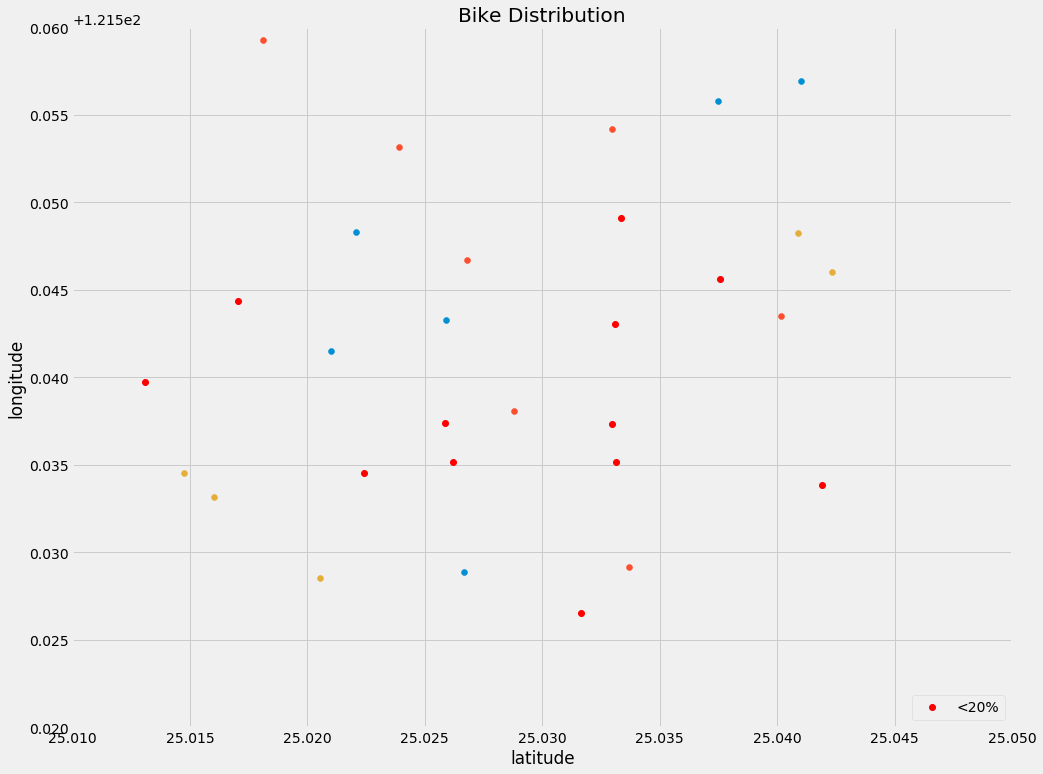

In [31]:
# with style
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize = (15, 12))
    plt.xlabel("latitude")
    plt.ylabel("longitude")
    plt.title("Bike Distribution")
    plt.plot(redlat, redlon, 'ro', label = '<20%')
    plt.scatter(yellowlat, yellowlon)
    plt.scatter(greenlat, greenlon)
    plt.scatter(bluelat, bluelon)
    plt.axis([25.01,25.05,121.52,121.56])
    plt.legend(loc = "lower right")

# plt.savefig('TA_1', dpi=200)

# 　